<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_of_figure_6B_for_Wenlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
figure_6B_file_path = '/content/drive/My Drive/WenLab/Figure 6-source data for Figure 6B.xlsx'
df_6B_sum = pd.read_excel(figure_6B_file_path, header = 2)
df_6B_sum.head(10)
df_6B_optic_ctr=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='AIB  ChR2')
df_6B_optic_Arch=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='AIB  ChR2;Plim-4  Arch')
df_6B_thermo_ctr=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='Thermal stimulus')
df_6B_thermo_ventral=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='Thermal stimulus;RIV Arch')
df_6B_thermo_head=pd.read_excel(figure_6B_file_path, header = 0, sheet_name='Thermal stimulus;Plim-4 Arch')
print(df_6B_sum.columns)
df_6B_sum.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['worm name', 'reversal length', 'sem', 'p-value U-test',
       'multi p-value', 'sig', 'Unnamed: 6', 'n', 'turn num', 'turn rate',
       'turn p-value', 'multi', 'Unnamed: 12', 'Unnamed: 13',
       'experimental condition'],
      dtype='object')


,worm name,reversal length,sem,p-value U-test,multi p-value,sig,Unnamed: 6,n,turn num,turn rate,turn p-value,multi,Unnamed: 12,Unnamed: 13,experimental condition
0,AIB::ChR2,3.60360,0.29881,NaN,NaN,NaN,NaN,49.0,39.0,0.795918,NaN,NaN,NaN,NaN,1.5s blue laser 1.5
1,WEN0843(QW1097_quan0199),6.61060,0.44999,1.109000e-05,3.327000e-05,****,NaN,73.0,48.0,0.657534,0.097589,ns,NaN,20190424,1.5s blue laser 1.61 +12s green laser 2.59
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p value,multi,no turn num,no response,NaN
4,ctr,2.45107,0.06847,NaN,NaN,NaN,NaN,385.0,192.0,0.498701,NaN,NaN,193,NaN,NaN
5,ventral(RIV SAAV) ARCH QW889,3.58069,0.24348,1.131100e-06,3.393300e-06,****,NaN,61.0,14.0,0.229508,0.000089,0.000268,47,NaN,NaN
6,head(RIV SAAD SAAV SMB) ARCH QW889,5.87383,0.38647,9.115700e-22,2.734710e-21,****,NaN,86.0,18.0,0.209302,0.000005,0.000016,63,5,NaN


In [116]:
####这里的处理代码基本上与figure5F、figure3D的一致
try:
    optic_data = df_6B_sum[df_6B_sum['worm name'].str.contains("AIB::ChR2", na=False)].iloc[0]
    optic_Arch_data = df_6B_sum[df_6B_sum['worm name'].str.contains("WEN0843", na=False)].iloc[0]
    thermo_ctrldata = df_6B_sum[df_6B_sum['worm name'].str.contains("ctr", na=False)].iloc[0]
    thermo_ventral_data = df_6B_sum[df_6B_sum['worm name'].str.contains("ventral", na=False)].iloc[0]
    thermo_head_data = df_6B_sum[df_6B_sum['worm name'].str.contains("head", na=False)].iloc[0]

    # 提取概率 (条形图高度)
    reversal_length = [optic_data['reversal length'], optic_Arch_data['reversal length'], thermo_ctrldata['reversal length'],thermo_ventral_data['reversal length'],thermo_head_data['reversal length']]
    lower_limit_col_name = 'sem'
    upper_limit_col_name = 'sem'

    lower_limits = [optic_data[lower_limit_col_name], optic_Arch_data[lower_limit_col_name], thermo_ctrldata[lower_limit_col_name],thermo_ventral_data[lower_limit_col_name],thermo_head_data[lower_limit_col_name]]
    upper_limits = [optic_data[upper_limit_col_name], optic_Arch_data[upper_limit_col_name], thermo_ctrldata[upper_limit_col_name],thermo_ventral_data[upper_limit_col_name],thermo_head_data[upper_limit_col_name]]
    #统计turn的数量与no turn的数量
    n_trials = [optic_data['n'], optic_Arch_data['n'], thermo_ctrldata['n'], thermo_ventral_data['n'], thermo_head_data['n']]
    turn_numbers = [optic_data['turn num'], optic_Arch_data['turn num'], thermo_ctrldata['turn num'], thermo_ventral_data['turn num'], thermo_head_data['turn num']]
    # 计算误差棒长度 (确保为正数)
    lower_errors = np.abs(np.array(lower_limits))
    upper_errors = np.abs(np.array(upper_limits))
    # plt.bar 的 yerr 参数需要 [下误差, 上误差]
    errors = [lower_errors, upper_errors]

    # 准备标签
    labels = ['AIB::ChR2', 'AIB::ChR2\nPlim4::Arch', 'thermal stimulus','Thermal stimulus\nRIV::Arch','Thermal stimulus\nPlim4::Arch']
    print("  reversal length", reversal_length)
    print("  Errors (lower, upper):", errors)
except (KeyError, IndexError) as e:
    print(f"步骤 1/2: 数据提取失败！请检查 Summary Sheet 的内容和列名是否正确。错误: {e}")
    # 如果提取失败，停止执行
    raise e

  reversal length [np.float64(3.6036), np.float64(6.6106), np.float64(2.45107), np.float64(3.58069), np.float64(5.87383)]
  Errors (lower, upper): [array([0.29881, 0.44999, 0.06847, 0.24348, 0.38647]), array([0.29881, 0.44999, 0.06847, 0.24348, 0.38647])]


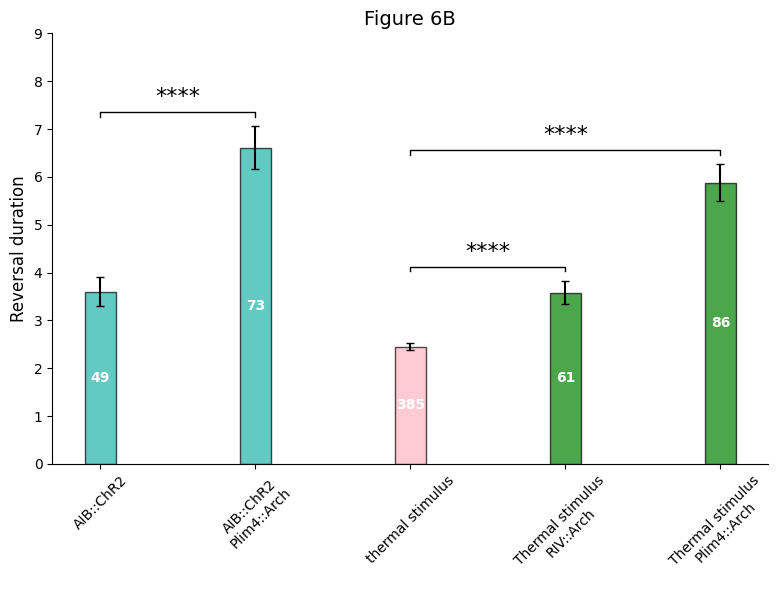

In [117]:
##绘制图形
# 绘制条形图
plt.figure(figsize=(8, 6))

# 设置条形图颜色 (对应 Fig 3D: 绿, 红, 蓝)
colors = ['lightseagreen','lightseagreen','lightpink', 'green', 'green']
# 条形图的 X 轴位置
x_pos = np.arange(len(labels))


# 绘制条形图，并传入计算好的误差
plt.bar(x_pos, reversal_length, yerr=errors, capsize=3, color=colors, alpha=0.7, edgecolor='black',width=0.2)

# 添加文本标签 (在条形图内部显示 n)
# 从之前提取的数据中获取 n
n = [optic_data['n'], optic_Arch_data['n'], thermo_ctrldata['n'],thermo_ventral_data['n'],thermo_head_data['n']]
turn_rate = [optic_data['turn rate'], optic_Arch_data['turn rate'], thermo_ctrldata['turn rate'],thermo_ventral_data['turn rate'],thermo_head_data['turn rate']]
for i in range(len(labels)):
    # 将数字转为整数再格式化
    plt.text(x_pos[i], reversal_length[i] * 0.5, f'{int(n[i])}',
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

def add_significance_bracket(x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    line_y = y_start + 0.1 # 标记线的高度，比y_start稍高
    text_y = line_y + 0.1  # 星号文本的高度
    # 绘制水平线
    plt.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # 添加星号文本
    plt.text((x2+x1)*0.5, text_y, text, ha='center', va='bottom', fontsize=16)

# a) 比较 optic (x=0) vs optic ARCH抑制组(x=1)
p_val_optic = optic_Arch_data.get('multi p-value', 1.0) # 使用 .get 防止 multi p-value 列不存在时报错
if pd.notna(p_val_optic) and p_val_optic < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[0]+upper_limits[0], reversal_length[1]+upper_limits[1])
    add_significance_bracket(x_pos[0], x_pos[1], y_max + 0.2, '****')

# b) 比较 Thermal ctr (x=2) vs Thermal ventral (x=3)
p_val_Thermal1 = thermo_ventral_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal1) and p_val_Thermal1 < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[3] + upper_limits[3])
    # 注意：为了避免标记线重叠，第二条线需要画得更高一点
    add_significance_bracket(x_pos[2], x_pos[3], y_max + 0.2, '****')
# c) 比较 Thermal ctr (x=2) vs Thermal head (x=4)
p_val_Thermal2 = thermo_head_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal2) and p_val_Thermal2 < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[4] + upper_limits[4])
    # 注意：为了避免标记线重叠，第二条线需要画得更高一点
    add_significance_bracket(x_pos[2], x_pos[4], y_max + 0.2, '****')

#  美化图表
plt.ylabel('Reversal duration(s)', fontsize=12)
plt.xticks(x_pos, labels, fontsize=10, rotation=45) # X 轴标签
plt.ylim(0, 9) # Y 轴范围，留出上方空间给星号
plt.title('Figure 6B', fontsize=14)
plt.grid(False) # 关闭背景网格
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(w_pad=0.1)# 调整布局防止标签重叠
plt.show()


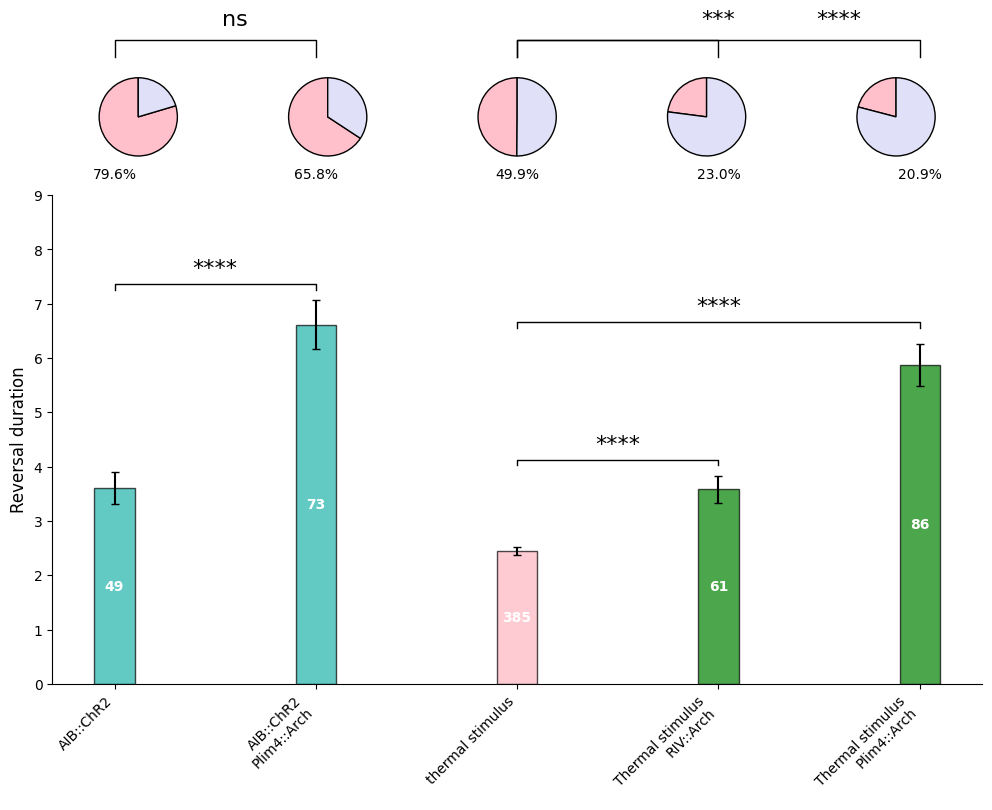

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

## 绘制图形 (合并柱状图和饼图)

# 1. 创建一个Figure和GridSpec (2行5列)
fig = plt.figure(figsize=(12, 8))
# height_ratios 让柱状图更高
# hspace 调整柱状图和饼图的垂直间距
gs = gridspec.GridSpec(
    2, 5,
    height_ratios=[1, 5],
    wspace=0.1,
    hspace=0.1
)

# 2. 【柱状图】代码基本类似于上面的代码块
ax_bar = plt.subplot(gs[1, :])


# 所有 'plt.' 都改成了 'ax_bar.'

colors = ['lightseagreen','lightseagreen','lightpink', 'green', 'green']
x_pos = np.arange(len(labels))

# 绘制条形图，并传入计算好的误差
ax_bar.bar(x_pos, reversal_length, yerr=errors, capsize=3, color=colors, alpha=0.7, edgecolor='black',width=0.2)

# 添加文本标签 (在条形图内部显示 n)
# (我们使用 Cell 2 中提取的 n_trials)
for i in range(len(labels)):
    ax_bar.text(x_pos[i], reversal_length[i] * 0.5, f'{int(n_trials[i])}',
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')


def add_significance_bracket(ax, x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    line_y = y_start + 0.1 # 标记线的高度，比y_start稍高
    text_y = line_y + 0.1  # 星号文本的高度
    # 绘制水平线
    ax.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # 添加星号文本
    ax.text((x2+x1)*0.5, text_y, text, ha='center', va='bottom', fontsize=16)

# a) 比较 optic (x=0) vs optic ARCH抑制组(x=1)
p_val_optic = optic_Arch_data.get('multi p-value', 1.0)
if pd.notna(p_val_optic) and p_val_optic < 0.0001:
    y_max = max(reversal_length[0]+upper_limits[0], reversal_length[1]+upper_limits[1])
    #  传入 ax_bar
    add_significance_bracket(ax_bar, x_pos[0], x_pos[1], y_max + 0.2, '****')

# b) 比较 Thermal ctr (x=2) vs Thermal ventral (x=3)
p_val_Thermal1 = thermo_ventral_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal1) and p_val_Thermal1 < 0.0001:
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[3] + upper_limits[3])
    #  传入 ax_bar
    add_significance_bracket(ax_bar, x_pos[2], x_pos[3], y_max + 0.2, '****')

# c) 比较 Thermal ctr (x=2) vs Thermal head (x=4)
p_val_Thermal2 = thermo_head_data.get('multi p-value', 1.0)
if pd.notna(p_val_Thermal2) and p_val_Thermal2 < 0.0001:
    y_max = max(reversal_length[2] + upper_limits[2], reversal_length[4] + upper_limits[4])
    #  传入 ax_bar, 并调高一点y值避免重叠
    add_significance_bracket(ax_bar, x_pos[2], x_pos[4], y_max + 0.3, '****')

#  美化图表
ax_bar.set_ylabel('Reversal duration', fontsize=12)
ax_bar.set_xticks(x_pos) # X 轴标签
ax_bar.set_xticklabels(labels, fontsize=10, rotation=45, ha='right') # 调整了旋转和对齐
ax_bar.set_ylim(0, 9) # Y 轴范围
ax_bar.grid(False) # 关闭背景网格
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)


# 饼图
pie_colors = ['pink','#E0E0F8']

for i in range(len(labels)):
    # 为这个饼图创建一个子图 (axes)
    # gs[1, i] 表示 “第1行，第i列”
    ax_pie = plt.subplot(gs[0, i])

    # 从 Cell 2 提取的列表中获取数据
    n_total = n_trials[i]
    n_turn = turn_numbers[i]
    n_no_turn = n_total - n_turn
    pie_wedges = []
    # 饼图的数据
    pie_slices = [n_turn, n_no_turn]

    if n_total == 0:
        pie_slices = [0, 1] # 避免除零错误

    wedges, texts=ax_pie.pie(
        pie_slices,
        colors=pie_colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    ax_pie.set_aspect('equal')
if i == 0:
   pie_wedges = wedges
###绘制显著性分析线与turn rate以及图例，虽然有点取巧但是只好根据柱状图的坐标来画，然后微调高度来配合饼状图
#p_val_omega_optic = float(optic_Arch_data.get('multi', 1.0))
p_val_omega_thermal1 = float(thermo_ventral_data.get('multi', 1.0))
p_val_omega_thermal2 = float(thermo_head_data.get('multi', 1.0))
def add_significance_bracket_pie(ax, x1, x2, y_offset, text):
    """为饼图绘制显著性标记线和文本"""
    line_y = ax_pie.get_ylim()[1] - 0.5 + y_offset # 调整Y轴位置，让它高于饼图但低于柱状图X轴
    text_y = line_y + 0.1
    x1_center = x_pos[x1]
    x2_center = x_pos[x2]
    y_sig_line = -0.5
    y_sig_level = ax_pie.get_ylim()[1] - 0.7

    ax_bar.plot([x_pos[x1], x_pos[x1], x_pos[x2], x_pos[x2]],
                [y_sig_level+11, y_sig_level + 11.3, y_sig_level + 11.3, y_sig_level+11],
                lw=1.0, c='black', clip_on=False) # clip_on=False 允许在轴外绘制
    ax_bar.text((x_pos[x1]+x_pos[x2])*0.6, y_sig_level + 11.5, text,
                ha='center', va='bottom', fontsize=16, clip_on=False)
# 比较 0 和 1 号饼图
add_significance_bracket_pie(ax_bar, 0, 1, 0, 'ns')

# 比较 2 和 3 号饼图
if pd.notna(p_val_omega_thermal1) and p_val_omega_thermal1 < 0.0001:
    add_significance_bracket_pie(ax_bar, 2, 3, 0.1, '****') # y_offset 稍高一点避免重叠
elif pd.notna(p_val_omega_thermal1) and p_val_omega_thermal1 < 0.001:
    add_significance_bracket_pie(ax_bar, 2, 3, 0.1, '***')

# 比较 2 和 4 号饼图
if pd.notna(p_val_omega_thermal2) and p_val_omega_thermal2 < 0.0001:
    add_significance_bracket_pie(ax_bar, 2, 4, 0.1, '****')

turnrate_per = [f"{i:.1%}" for i in turn_rate]   #将turn rate转化为百分数
y_lim_array = np.ones_like(len(labels)) * ax_pie.get_ylim()[1]
for i in range(len(turn_rate)):
    ax_bar.text(x_pos[i],y_lim_array*7.5, f'{turnrate_per[i]}',
             ha='center', va='center', color='black', fontsize=10,clip_on=False)

plt.show()

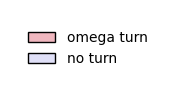

In [119]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

pie_colors_map = {
    'omega turn': '#F0B7BF',
    'no turn': '#E0E0F8'
}

# 2. 创建图例的 "代理" 图形元素
legend_elements = [
    Patch(facecolor=pie_colors_map['omega turn'], edgecolor='black', label='omega turn'),
    Patch(facecolor=pie_colors_map['no turn'], edgecolor='black', label='no turn')
]
fig, ax = plt.subplots(figsize=(2, 1))

ax.legend(handles=legend_elements, loc='center', frameon=False, fontsize=10)
ax.axis('off')

# 6. 保存图例
# 我们把它保存为一个单独的 PNG 文件
# transparent=True 会让背景变透明，这正是 P 图所需要的！
output_filename = "legend_only.png"
plt.savefig(
    output_filename,
    bbox_inches='tight',  # 裁剪掉周围多余的空白
    transparent=True      # !!! 让背景透明
)